# Ejercicios capitulo 1 

#### Hernández Martínez Oscar Gerardo

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import rdata as rd
import math
%matplotlib inline


### 1.1 To compare the earthquake and explosion signals, plot the data displayed in Fig. 1.7 on the same graph using different colors or different line types and comment on the results. (The R code in Example 1.11 may be of help on how to add lines to existing plots.)

In [2]:
data1 = rd.parser.parse_file('EQ5.rda')
converted = rd.conversion.convert(data1)
data1 = pd.DataFrame(converted)

C:\Users\jxsje\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:234: UserWarning: Unknown encoding. Assumed ASCII.
  warnings.warn(f"Unknown encoding. Assumed ASCII.")


In [3]:
data2 = rd.parser.parse_file('EXP6.rda')
converted = rd.conversion.convert(data2)
data2 = pd.DataFrame(converted)

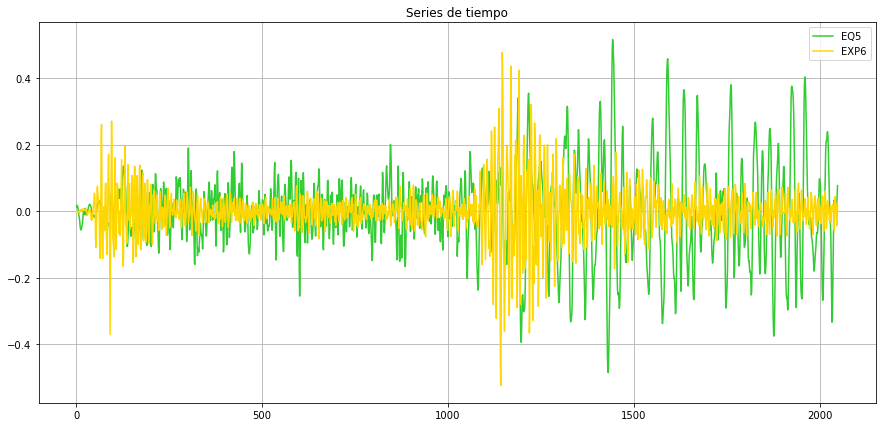

In [4]:
plt.figure(figsize=(15,7))
x = ["EQ5", "EXP6"]
plt.plot(data1, color = 'limegreen')
plt.plot(data2, color = 'gold')
plt.legend(x, loc = 'best')
plt.grid()
plt.title("Series de tiempo")
plt.show()

### 1.2 Consider a signal-plus-noise model of the general form $x_t = s_t + w_t$, where wt is Gaussian white noise with $σ^2_w = 1$. Simulate and plot $n = 200$ observations from each of the following two models.


a) $x_t = s_t + w_t$, for $t = 1, \dots, 200.$

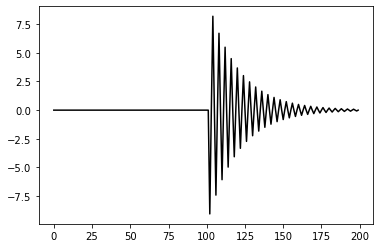

In [5]:
W = np.random.randn(200)
X = np.zeros(200)
W[0] = X[0]
W[1] = X[1]
for i in range(1,len(W)):
    if i <= 100:
        X[i] = 0
    else:
        X[i] = 10 * math.exp(-((i-100)/20)) * math.cos((2*math.pi*i)/4)
        

plt.plot(X, color = "black")

b) $x_t = s_t + w_t$, for $t = 1, . . ., 200$

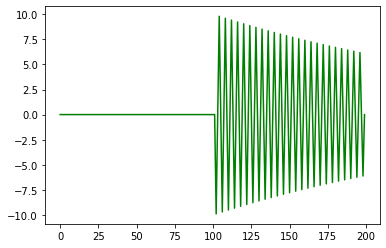

In [6]:
W = np.random.randn(200)
X = np.zeros(200)
W[0] = X[0]
W[1] = X[1]
for i in range(1,len(W)):
    if i <= 100:
        X[i] = 0
    else:
        X[i] = 10 * math.exp(-((i-100)/200)) * math.cos((2*math.pi*i)/4)
        

plt.plot(X, color = "green")

### 1.3 a) Generate $n = 100$ observations from the autoregression

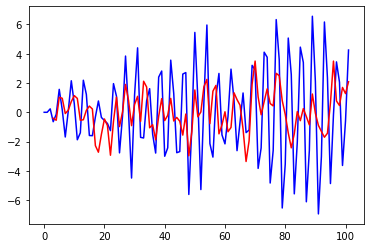

In [7]:
W = np.random.randn(102)
X = np.zeros(102)
V = np.zeros(102)
W[0] = X[0]
W[1] = X[1]

for i in range(2,len(W)):
    X[i] = - 0.9 * X[i-2] + W[i] 
Y = pd.DataFrame(X)

for i in range(4, len(Y)):
    V = Y.rolling(4).sum()

plt.plot(X, color = "blue")
plt.plot(V, color = "red")
plt.show()

### b) Repeat (a) but with $x_t = cos(2\pi t/4)$.

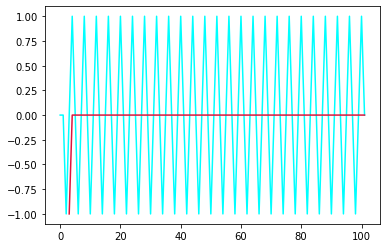

In [8]:
X = np.zeros(102)
V = np.zeros(102)

for i in range(2,len(W)):
    X[i] = math.cos((2*math.pi*i)/4) 
    
Y = pd.DataFrame(X)

for i in range(4, len(Y)):
    V = Y.rolling(4).sum()

plt.plot(X, color = "cyan")
plt.plot(V, color = "crimson")
plt.show()

### c) Repeat (b) but with added $N(0, 1)$ noise, $x_t = cos(2\pi t/4) + w_t$.

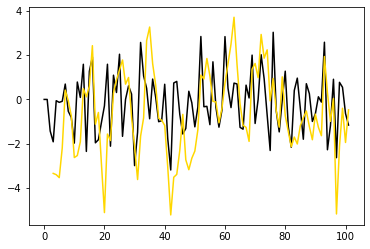

In [9]:
W = np.random.randn(102)
X = np.zeros(102)
V = np.zeros(102)
W[0] = X[0]
W[1] = X[1]

for i in range(2,len(W)):
    X[i] =  math.cos((2 * math.pi * i) / 4) + W[i]
Y = pd.DataFrame(X)

for i in range(4, len(Y)):
    V = Y.rolling(4).sum()

plt.plot(X, color = "black")
plt.plot(V, color = "gold")
plt.show()

### d) Compare and contrast $(a)–(c)$; i.e., how does the moving average change each series.


### 1.4 Show that the autocovariance function can be written as $\gamma(s, t) = E[(x_s − \mu_s )(x_t − \mu_t)] = E(x_s x_t) − \mu_s \mu_t$

$$E[(x_s - \mu_s)(x_t - \mu_t)] = E[x_s x_t - x_s\mu_t - \mu_sx_t + \mu_s\mu_t] = E[x_s x_t] - E[x_s\mu_t] - E[x_t\mu_s] + E[\mu_s \mu_t] =$$

$$E[x_s x_t] - \mu_t E[x_s] - \mu_s E[x_t] + \mu_s \mu_t = E[x_s x_t] - \mu_t \mu_s - \mu_s\mu_t + \mu_s \mu_t = E[x_s x_t] - \mu_s \mu_t$$

### 1.5 For the two series, $x_t$ , in Problem 1.2 (a) and (b):

### a) Compute and plot the mean functions $\mu_x (t)$, for $t = 1, . . ., 200.$

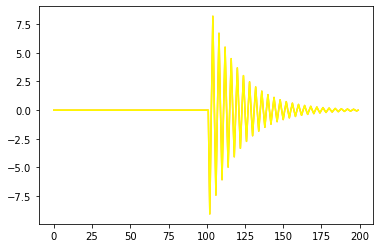

In [10]:
W = np.random.randn(200)
X = np.zeros(200)
mu = np.zeros(200)
W[0] = X[0]
W[1] = X[1]
for i in range(1,len(W)):
    if i <= 100:
        X[i] = 0
    else:
        X[i] = 10 * math.exp(-((i-100)/20)) * math.cos((2*math.pi*i)/4)
        mu[i] = X[i].mean()

plt.plot(X, color = "orange")
plt.plot(mu, color = "yellow")
plt.show()


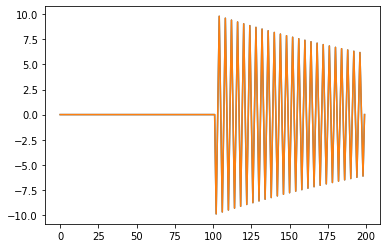

In [11]:
W = np.random.randn(200)
X = np.zeros(200)
miu = np.zeros(200)
W[0] = X[0]
W[1] = X[1]
for i in range(1,len(W)):
    if i <= 100:
        X[i] = 0
    else:
        X[i] = 10 * math.exp(-((i-100)/200)) * math.cos((2*math.pi*i)/4)
        miu[i] = X[i].mean()
        
plt.plot(X)
plt.plot(miu)
plt.show()

### b) Calculate the autocovariance functions, $\gamma_x (s, t),$ for $s, t = 1, . . ., 200$.

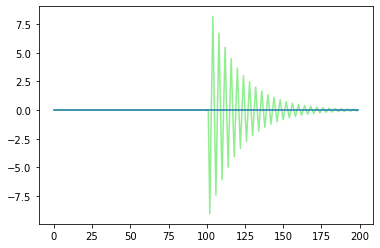

In [12]:
W = np.random.randn(200)
X = np.zeros(200)
cv = np.zeros(200)
W[0] = X[0]
W[1] = X[1]
for i in range(1,len(W)):
    if i <= 100:
        X[i] = 0
    else:
        X[i] = 10 * math.exp(-((i-100)/20)) * math.cos((2*math.pi*i)/4)
        cv[i] = X[i] * cv[i] - X.mean() * cv.mean()
        
plt.plot(X, color="lightgreen")
plt.plot(cv)
plt.show()

### 1.6 Consider the time series

$x_t = \beta_1 + \beta_2t + w_t$,

where $\beta_1$ and $\beta_2$ are known constants and $w_t$ is a white noise process with variance $\sigma^2_w$.

(a) Determine whether $x_t$ is stationary.

(b) Show that the process $y_t = x_t − x_{t−1}$ is stationary.

(c) Show that the mean of the moving average

$$v_t = \frac{1}{2q+1} \sum_{j = -q}^q x_{t-j}$$

is $\beta_1 + \beta_{2}t$, and give a simplified expression for the autocovariance function.

### a)

$$E[x_t] = E[\beta_1 + \beta_2t + w_t] = \beta_1 + \beta_2 t + 0 = \beta_1 + \beta_2 t$$ 

Como depende del valor del parámetro $t$ el proceso $x_t$ no es etacionario, pues la media no es constante

### b)

$$E[y_t] = E[x_t - x_{t-1}] = E[\beta_1 + \beta_2 t + w_t - (\beta_1 + \beta_2 (t-1) + w_{t-1})] = $$

$$E[\beta_1 - \beta_1 + \beta_2 t - \beta_2 t + \beta_2 + w_t - w_{t-1}] = E[\beta_2 + w_t - w_{t-1}] = \beta_2$$

$$Var[y_t] = E[(y_t - E[y_t])^2] = E[(y_t - \beta_2)^2] = E[(\beta_2 + w_t - w_{t-1} - \beta_2)^2] = E[(w_t - w_{t-1})^2]$$

$$E[w_t^2 - 2w_t w_{t-1} + w_{t-1}^2] = E[w_t^2] - 2E[w_t]E[w_{t-1}] + E[w_{t-1}^2] = 2 \sigma_{w}^2 < \infty$$

$$\gamma(t+k, t) = cov(y_{t+k}, y_t) = E[(y_{t+k} - \bar{y}_{t+k})(y_t - \bar{y}_t)] = E[(\beta_2 - \beta_2)(\beta_2 - \beta_2)] = 0$$

$\therefore$ el proceso es estacionario

### c)

$$v_t = \frac{1}{2q+1} \sum_{j=-q}^q x_{t-j}$$

$$E[v_t] = E[\frac{1}{2q+1} \sum_{j=-q}^q x_{t-j}] = \frac{1}{2q+1} \sum_{j=-q}^n E[x_{t-j}] = \frac{1}{2q+1} (2q+1)(\beta_1 + \beta_2 t) = \beta_1 + \beta_2 t$$

### 1.7 For a moving average process of the form $x_t = w_{t−1} + 2w_t + w_{t+1}$, where $w_t$ are independent with zero means and variance $σ^2_w$, determine the autocovariance and autocorrelation functions as a function of lag $h = s −t$ and plot the ACF as a function of h.

$$x_t = w_{t-1}+2w_t+w_{t+1}$$

$$\perp w_t \sim WN(0,\sigma_w^2)$$

Obs. $h = 1 \Rightarrow s = t+1$

$$\gamma_{x} (t,t+1) = cov(x_t, x_{t+1}) = cov(w_{t-1} + 2w_t + w_{t+1}, w_{t} + 2w_{t+1} + w_{t+1}) = $$

$$cov(2w_t, w_t) + cov(2w_{t+1}, w_{t+1}) = 4cov(w_t, w_t) + 4cov(w_{t+1}, w_{t+1}) = 4\sigma_w^2 + 4\sigma_w^2 = 8 \sigma_w^2$$

$$\rho = \frac{cov(x_t, x_{t+1})}{\sqrt{Var(x_t)} \sqrt{Var(x_{t+1})}} = \frac{\gamma(t, t+1)}{\sqrt{Var(w_{t-1} + 2w_t + w_{t+1})} \sqrt{Var(w_t + 2w_{t+1} + w_{t+2})}} = $$

$$\frac{8 \sigma_w^2}{2\sigma_w \cdot 2\sigma_w} = \frac{8 \sigma_w^2}{4 \sigma_w^2} = 2$$

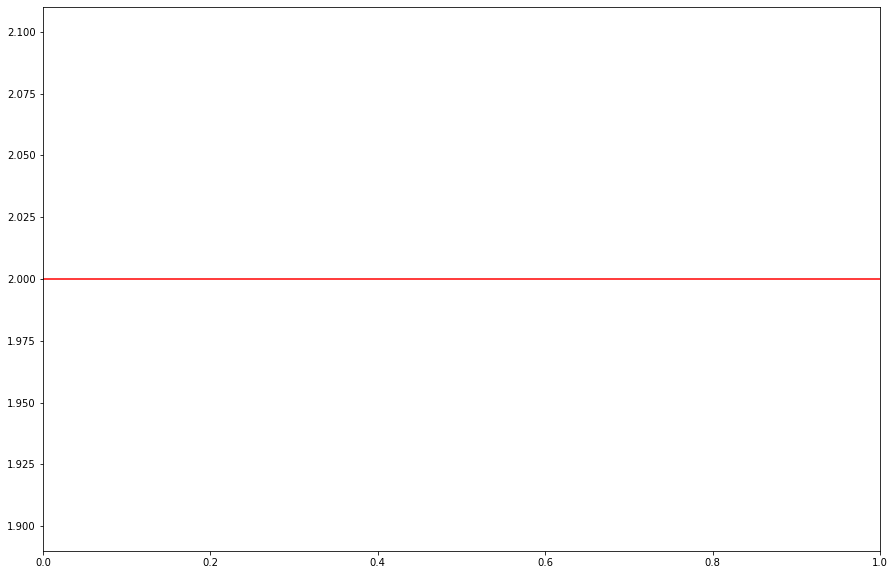

In [13]:
plt.figure(figsize=(15,10))
plt.axhline(y=2, xmin=-3, xmax=3, color = 'red')